'''code explanation

all images that will be taken, before predicting will be rotated with the wind direction.
so that the wind direction will be: ------------> from left to right.

Pictures will be transformed to black and white, transforamtion will make fire and burnt area to black
and green and not burnt to white.

that's why if a black column is on the left side of the image and all the rest is white, 
the label will be 5, the maximum. and vice versa'''

In [1]:
pip install --upgrade numpy==1.21.0 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


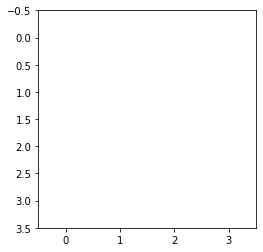

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.gray()
va= np.ones([4,4])
plt.imshow(va, cmap='Greys_r', vmin= 0, vmax = 1)
plt.show()

In [5]:
def draw_column_white(picture, start_column, width ):
    width += 1
    picture[: , np.r_[-1:start_column , width + start_column :picture.shape[0]]] = 0
    return picture

def draw_column_black(picture, start_column, width ):
    picture[: , start_column:width + start_column] = 0
    return picture

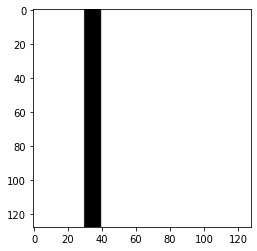

In [6]:
va = np.ones([128, 128])
va = draw_column_black(va, 30, 10)
plt.imshow(va)
plt.show()

In [7]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


Noise function for augmentaion

In [8]:
import random

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 1            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    #output[probs > 1 - (prob / 2)] = white
    return output

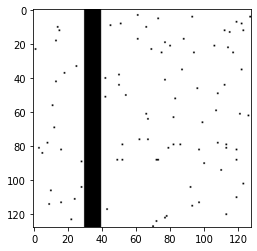

In [9]:
va = np.ones([128, 128])
v = sp_noise(va , 0.01) #+ va
vv = draw_column_black(v, 30, 10)
plt.imshow(vv)
plt.show()

classes for creating data

In [10]:
import numpy as np
import pandas as pd
import random

class wf_putoff_sample:
    def __init__(self, picture, Y):
        self.picture = picture
        self.Y = Y
    
    def to_df(self):
        df = pd.DataFrame(self.picture.flatten(), self.Y)
        return df
    
    

class wf_putoff:
    # empty 128 * 128:
    def white_picture():
        return np.ones([128,128])
    
    '''def white_picture128():
        return np.ones([128,128])'''
    
    def draw_column_black(picture, start_column, width ):
        picture[: ,start_column: start_column + width ] = 0
        return picture
    
    def sp_noise(image, prob):
        '''
        Add salt and pepper noise to image
        prob: Probability of the noise
        '''
        output = image.copy()
        if len(image.shape) == 2:
            black = 0
            white = 1            
        else:
            colorspace = image.shape[2]
            if colorspace == 3:  # RGB
                black = np.array([0, 0, 0], dtype='uint8')
                white = np.array([255, 255, 255], dtype='uint8')
            else:  # RGBA
                black = np.array([0, 0, 0, 255], dtype='uint8')
                white = np.array([255, 255, 255, 255], dtype='uint8')
        probs = np.random.random(output.shape[:2])
        output[probs < (prob / 2)] = black
        #output[probs > 1 - (prob / 2)] = white
        return output
    
        
    def augment(image,start_column, width ):
        va =  sp_noise(image, 0.01)
        return draw_column_black(va, start_column, width)

In [11]:
#import wf_putoff_sample
#import wf_putoff

''' creating data'''
my_objects = []

for y in range (5,0,-1):
    for i in range(5):
        for j in range(100):
            my_objects.append(wf_putoff_sample(wf_putoff.augment(wf_putoff.white_picture(),random.randrange(25 * i,25 * i +25),random.randrange(15)) , y))
            
fields = ['picture', 'Y']           
df = pd.DataFrame([{fn: getattr(f, fn) for fn in fields} for f in my_objects])
df.head()


,picture,Y
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",5
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",5
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",5
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",5
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",5


#to do, add data with black row and diagnol

classes helper

In [12]:
#128 == np.shape(df['picture'][0][1])[0]
#len(df['picture'][0][0][:])
df['picture'][0][0]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

functions for preprocessing for linear regression

In [13]:
def find_first(item, vec):
    """return the index of the first occurence of item in vec"""
    for i in range(len(vec)):
        if item == vec[i]:
            return i
    return -1

''' the fire will contiune with wind direction until the end or until hits fire, a black square'''
def get_white_until_end_or_black(vec, start):
    next_black = find_first(0, vec[start:])
    if next_black == -1:
        return len(vec[start:])
    else:
        return next_black

def calc_row_will_be_burnt(row):
    counter = 0
    start = find_first(0, row)
    if start == -1:
        return counter;
    while start < len(row):
        delta = get_white_until_end_or_black(row, start + 1)
        start += delta
        if delta == 0:
            start += 1
        else:
            counter += delta
    return counter   
        
    
def calc_area_will_be_burnt(d2Array):
    counter = 0
    for i in range (np.shape(d2Array[1])[0]):
        #for j in range(np.shape(d2Array[0][0])[0]):
        counter += calc_row_will_be_burnt(d2Array[i])
    return counter                

In [14]:
#g = get_white_until_end_or_black(df['picture'][0][0],17)
#g = calc_row_will_be_burnt(df['picture'][0][0])
g = calc_area_will_be_burnt(df['picture'][0])
print(g)

13682


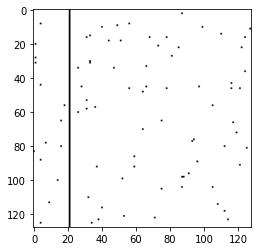

In [15]:
plt.gray()
plt.imshow(df['picture'][0])
plt.show()

vectorization - not in use meanwhile

In [16]:
from numba import jit

vectorized_calc_area = jit(calc_area_will_be_burnt)

In [17]:
y = vectorized_calc_area(df['picture'][0])
print(y)

/tmp/ipykernel_95/3762243227.py:31: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "calc_area_will_be_burnt" failed type inference due to: Untyped global name 'calc_row_will_be_burnt': Cannot determine Numba type of <class 'function'>

File "../../../tmp/ipykernel_95/3762243227.py", line 35:
<source missing, REPL/exec in use?>

  def calc_area_will_be_burnt(d2Array):
/tmp/ipykernel_95/3762243227.py:31: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "calc_area_will_be_burnt" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../tmp/ipykernel_95/3762243227.py", line 33:
<source missing, REPL/exec in use?>

  def calc_area_will_be_burnt(d2Array):
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "calc_area_will_be_burnt" was compiled in 

13682


creating data for linear regression

In [18]:
def calc_area_will_be_burnt_df(row):
    d2Array = row['picture']
    counter = 0
    for i in range (np.shape(d2Array[1])[0]):
        #for j in range(np.shape(d2Array[0][0])[0]):
        counter += calc_row_will_be_burnt(d2Array[i])
    return counter  

In [19]:
dd =df.apply(calc_area_will_be_burnt_df, axis=1)
dd

0       13682
1       12476
2       14529
3       13526
4       13526
        ...  
2495     5816
2496     3270
2497     5390
2498     4692
2499     3949
Length: 2500, dtype: int64

In [20]:
ddf = pd.concat([dd.rename('X'),df['Y']], axis=1)

In [21]:
ddf.tail()

,X,Y
2495,5816,1
2496,3270,1
2497,5390,1
2498,4692,1
2499,3949,1


In [22]:
pip install sagemaker

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install awscli

Note: you may need to restart the kernel to use updated packages.


In [24]:
!mkdir ~/.aws

mkdir: cannot create directory '/home/studio-lab-user/.aws': File exists


In [25]:
'''%%writefile ~/.aws/credentials

[default]
aws_access_key_id =  #< paste your access key here, run this cell, then delete the cell >
aws_secret_access_key =#< paste your access key here, run this cell, then delete the cell >'''

'%%writefile ~/.aws/credentials\n\n[default]\naws_access_key_id =  #< paste your access key here, run this cell, then delete the cell >\naws_secret_access_key =#< paste your access key here, run this cell, then delete the cell >'

In [26]:
#removed it's the above code with keys

Overwriting /home/studio-lab-user/.aws/credentials


In [27]:
%%writefile ~/.aws/config

[default]
region=us-west-2

Overwriting /home/studio-lab-user/.aws/config


splitting to train and test

In [28]:
train_data, test_data = np.split(ddf.sample(frac=1, random_state=1729), [int(0.8 * len(ddf))])
print(train_data.shape, test_data.shape)

(2000, 2) (500, 2)


In [29]:
import sagemaker

bucket = sagemaker.Session().default_bucket()
prefix = "sagemaker/linear-put-out-fires"
prefix_job_name = 'linear-put-out-fires-'
# Define IAM role
import boto3
import re
from sagemaker import get_execution_role

role = 'arn:aws:iam::555467231644:role/service-role/AmazonSageMaker-ExecutionRole-20220125T140012' 
#get_execution_role()

failed to run straight from DataFrame 

In [30]:
import io
import numpy as np
import sagemaker.amazon.common as smac

'''vectors =  np.array([ddf['X']]).astype("float32")
labels = ddf['Y'].astype("float32")

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, vectors, labels)
buf.seek(0)'''

'vectors =  np.array([ddf[\'X\']]).astype("float32")\nlabels = ddf[\'Y\'].astype("float32")\n\nbuf = io.BytesIO()\nsmac.write_numpy_to_dense_tensor(buf, vectors, labels)\nbuf.seek(0)'

In [31]:
'''import boto3
import os

key = "recordio-pb-data"
boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, "train", key)).upload_fileobj(buf)
s3_train_data = "s3://{}/{}/train/{}".format(bucket, prefix, key)
print("uploaded training data location: {}".format(s3_train_data))'''

'import boto3\nimport os\n\nkey = "recordio-pb-data"\nboto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, "train", key)).upload_fileobj(buf)\ns3_train_data = "s3://{}/{}/train/{}".format(bucket, prefix, key)\nprint("uploaded training data location: {}".format(s3_train_data))'

In [32]:
'''import time
from time import gmtime, strftime  # For labeling SageMaker models, endpoints, etc.

linear_job = prefix_job_name + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())

print("Job name is:", linear_job)

linear_training_params = {
    "RoleArn": role,
    "TrainingJobName": linear_job,
    "AlgorithmSpecification": {"TrainingImage": s3_train_data, "TrainingInputMode": "Pipe"},
    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.c4.2xlarge", "VolumeSizeInGB": 1},
    "InputDataConfig": [
        {
            "ChannelName": "train",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": "s3://{}/{}/train/".format(bucket, prefix),
                    "S3DataDistributionType": "ShardedByS3Key",
                }
            },
            "CompressionType": "None",
            "RecordWrapperType": "None",
        },
        {
            "ChannelName": "validation",
            "DataSource": {
                "S3DataSource": {
                    "S3DataType": "S3Prefix",
                    "S3Uri": "s3://{}/{}/validation/".format(bucket, prefix),
                    "S3DataDistributionType": "FullyReplicated",
                }
            },
            "CompressionType": "None",
            "RecordWrapperType": "None",
        },
    ],
    "OutputDataConfig": {"S3OutputPath": "s3://{}/{}/".format(bucket, prefix)},
    "HyperParameters": {
        "feature_dim": "auto",
        "mini_batch_size": "100",
        "predictor_type": "regressor",
        "epochs": "10",
        "num_models": "32",
        "loss": "auto",
        "normalize_label": "false",
    },
    "StoppingCondition": {"MaxRuntimeInSeconds": 7 * 60},
}'''

'import time\nfrom time import gmtime, strftime  # For labeling SageMaker models, endpoints, etc.\n\nlinear_job = prefix_job_name + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())\n\nprint("Job name is:", linear_job)\n\nlinear_training_params = {\n    "RoleArn": role,\n    "TrainingJobName": linear_job,\n    "AlgorithmSpecification": {"TrainingImage": s3_train_data, "TrainingInputMode": "Pipe"},\n    "ResourceConfig": {"InstanceCount": 1, "InstanceType": "ml.c4.2xlarge", "VolumeSizeInGB": 1},\n    "InputDataConfig": [\n        {\n            "ChannelName": "train",\n            "DataSource": {\n                "S3DataSource": {\n                    "S3DataType": "S3Prefix",\n                    "S3Uri": "s3://{}/{}/train/".format(bucket, prefix),\n                    "S3DataDistributionType": "ShardedByS3Key",\n                }\n            },\n            "CompressionType": "None",\n            "RecordWrapperType": "None",\n        },\n        {\n            "ChannelName": "validat

In [33]:
'''%%time

region = boto3.Session().region_name
sm = boto3.client("sagemaker")

sm.create_training_job(**linear_training_params)
status = sm.describe_training_job(TrainingJobName=linear_job)["TrainingJobStatus"]
print(status)
sm.get_waiter("training_job_completed_or_stopped").wait(TrainingJobName=linear_job)
if status == "Failed":
    message = sm.describe_training_job(TrainingJobName=linear_job)["FailureReason"]
    print("Training failed with the following error: {}".format(message))
    raise Exception("Training job failed")'''

'%%time\n\nregion = boto3.Session().region_name\nsm = boto3.client("sagemaker")\n\nsm.create_training_job(**linear_training_params)\nstatus = sm.describe_training_job(TrainingJobName=linear_job)["TrainingJobStatus"]\nprint(status)\nsm.get_waiter("training_job_completed_or_stopped").wait(TrainingJobName=linear_job)\nif status == "Failed":\n    message = sm.describe_training_job(TrainingJobName=linear_job)["FailureReason"]\n    print("Training failed with the following error: {}".format(message))\n    raise Exception("Training job failed")'

In [34]:
my_region = boto3.session.Session().region_name
my_region

'us-west-2'

In [35]:
import time
from time import gmtime, strftime  # For labeling SageMaker models, endpoints, etc.

bucket_name =prefix_job_name + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
s3 = boto3.resource('s3')

# really bright - (:
'''Regions outside of us-east-1 require the appropriate LocationConstraint to be 
specified in order to create the bucket in the desired region.'''
#
try:
    if  my_region == 'us-east-1':
      s3.create_bucket(Bucket=bucket_name)
    else: 
      s3.create_bucket(Bucket=bucket_name, CreateBucketConfiguration={ 'LocationConstraint': my_region })
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)
    
    

S3 bucket created successfully


In [63]:
import os

'''https://github.com/aws/sagemaker-python-sdk/issues/819'''
# https://jyotiyadav99111.medium.com/aws-sagemaker-demonstration-for-machine-learning-model-deployment-fbb26aac127c
# as per some documentations in AWS the target variable should be the first column

pd.concat([train_data['Y'], train_data['X']], axis=1).to_csv('train.csv', index=False, header=False)
#train_data.to_csv('train.csv', index=False, header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='text/csv')

In [70]:
import boto3, re, sys, math, json, os, sagemaker
from sagemaker.predictor import csv_serializer

'''
what a hassle to find all options:
https://github.com/aws/sagemaker-python-sdk/issues/1902
https://github.com/aws/sagemaker-python-sdk/tree/master/src/sagemaker/image_uri_config
'''

linear_container = sagemaker.image_uris.retrieve("linear-learner", my_region, "latest")

sess = sagemaker.Session()
linear = sagemaker.estimator.Estimator(linear_container,role, instance_count=1, instance_type='ml.m4.xlarge',output_path='s3://{}/{}/output'.format(bucket_name, prefix),sagemaker_session=sess)
#xgb.set_hyperparameters(max_depth=5,eta=0.2,gamma=4,min_child_weight=6,subsample=0.8,silent=0,objective='binary:logistic',num_round=100)
linear.set_hyperparameters(feature_dim='auto', mini_batch_size=16, predictor_type='regressor',epochs=3,num_models=4, normalize_label='false')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: latest.


In [71]:
linear.fit({'train': s3_input_train})

2022-02-04 06:42:38 Starting - Starting the training job...
2022-02-04 06:43:02 Starting - Launching requested ML instancesProfilerReport-1643956957: InProgress
...
2022-02-04 06:43:35 Starting - Preparing the instances for training............
2022-02-04 06:45:45 Downloading - Downloading input data...
2022-02-04 06:46:10 Training - Downloading the training image...
2022-02-04 06:46:47 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[02/04/2022 06:46:38 INFO 139654967449408] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_sc

In [72]:
linear_predictor = linear.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')

-------!

In [73]:
from sagemaker.serializers import CSVSerializer

test_data_array = test_data.drop(['Y'], axis=1).values #load the data into an array
linear_predictor.serializer = CSVSerializer() # set the serializer type
predictions = linear_predictor.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)

(0,)


/tmp/ipykernel_95/1584445340.py:6: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array


In [95]:
predictions

'{"predictions": [{"score": 3.0866589546203613}, {"score": 3.1194138526916504}, {"score": 3.0979819297790527}, {"score": 3.0957603454589844}, {"score": 3.113304615020752}, {"score": 3.1035895347595215}, {"score": 3.1388349533081055}, {"score": 3.1315877437591553}, {"score": 3.12668776512146}, {"score": 3.1188228130340576}, {"score": 3.097766876220703}, {"score": 3.128492832183838}, {"score": 3.1184017658233643}, {"score": 3.1304233074188232}, {"score": 3.1400845050811768}, {"score": 3.0917606353759766}, {"score": 3.097520589828491}, {"score": 3.0867486000061035}, {"score": 3.0861709117889404}, {"score": 3.0976550579071045}, {"score": 3.1116697788238525}, {"score": 3.089019536972046}, {"score": 3.0875728130340576}, {"score": 3.093059539794922}, {"score": 3.1078670024871826}, {"score": 3.0913798809051514}, {"score": 3.0885581970214844}, {"score": 3.089404582977295}, {"score": 3.0984702110290527}, {"score": 3.089261293411255}, {"score": 3.111799716949463}, {"score": 3.1038224697113037}, {

In [96]:
result = json.loads(predictions)
test_pred = np.array([r["score"] for r in result["predictions"]])

In [99]:
np.shape(test_pred)

(500,)

In [100]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


testing - data should be * 100 for error being very low - amazon charges me so, we had a small data

In [102]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(test_pred, test_data['Y'])) 
print(f"Test RSME: {rmse}")

Test RSME: 1.4311726447078894


CNN

Ensemble

In [ ]:
'''ensembled =  0.5 * np.array(test_pred) + 0.5 * np.array(cnn_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(ensembled, test_data['Y'])) 
print(f"Test RSME: {rmse}")'''

delete all

In [ ]:
linear_predictor.delete_endpoint(delete_endpoint_config=True)
bucket_to_delete = boto3.resource('s3').Bucket(bucket_name)
bucket_to_delete.objects.all().delete()